In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

## Let's get the dataset

In [0]:
from keras.datasets import mnist

In [0]:
(x_tr_src, y_tr_src),(x_te_src,y_te_src) = mnist.load_data()

In [0]:
# How many samples have we got?

In [5]:
x_tr_src.shape # 60K samples of 28x28!

(60000, 28, 28)

In [6]:
y_tr_src.shape #60K labels...a label per sample

(60000,)

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

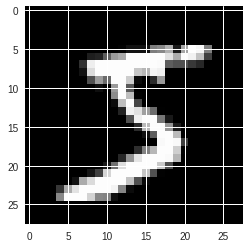

In [8]:
plt.imshow(x_tr_src[0], cmap='gray') #the first sample is a 5

In [9]:
y_tr_src[0] #then, the first label should be a 5

5

In [10]:
set(y_tr_src) #we have 10 different classes! 

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

## Data preprocessing

### Data normalization - values from 0 to 1

In [0]:
x_tr_src = x_tr_src.astype('float32')/255.
x_te_src = x_te_src.astype('float32')/255.

### Data vectorization - a vector of 28*28 elements per image, just to fit our NN input

In [0]:
x_tr = x_tr_src.reshape((x_tr_src.shape[0], (28*28)))
x_te = x_te_src.reshape((x_te_src.shape[0], (28*28)))

In [13]:
x_tr.shape

(60000, 784)

### Labels to categorical - one hot encoded vector

In [0]:
from keras.utils import to_categorical

In [0]:
y_tr = to_categorical(y_tr_src)
y_te = to_categorical(y_te_src)

In [16]:
y_tr[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

## Plot utils

In [0]:
def print_acc(hist):
    epochs = range(1, len(hist['acc'])+1)
    plt.plot(epochs, hist['acc'], 'b', label='Training acc')
    plt.plot(epochs, hist['val_acc'], 'r', label='Validation acc')
    plt.title('Training and validation Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Acc')
    plt.legend()
    plt.show()

In [0]:
def print_loss(hist):
    epochs = range(1, len(hist['loss'])+1)
    plt.plot(epochs, hist['loss'], 'b', label='Training loss')
    plt.plot(epochs, hist['val_loss'], 'r', label='Validation loss')
    plt.title('Training and validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [0]:
from keras import models, layers #packages

# Densely-connected network approach

### 1- Let's create the model

In [0]:
#A function to create the model
def build_dense_model():
    model = models.Sequential()
    
    model.add(layers.Dense(128, activation='relu', input_shape=(28*28,)))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [0]:
dense_model = build_dense_model() #Create the model

In [22]:
dense_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [23]:
dense_hist = dense_model.fit(x_tr, y_tr, epochs=10, batch_size=128, validation_data=(x_te,y_te)) #train the model

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 51us/step - loss: 0.3344 - acc: 0.9077 - val_loss: 0.1909 - val_acc: 0.9438
Epoch 2/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1585 - acc: 0.9544 - val_loss: 0.1335 - val_acc: 0.9600
Epoch 3/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.1149 - acc: 0.9673 - val_loss: 0.1105 - val_acc: 0.9664
Epoch 4/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0893 - acc: 0.9741 - val_loss: 0.0920 - val_acc: 0.9730
Epoch 5/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0733 - acc: 0.9788 - val_loss: 0.0848 - val_acc: 0.9743
Epoch 6/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0606 - acc: 0.9823 - val_loss: 0.0807 - val_acc: 0.9765
Epoch 7/10
60000/60000 [==============================] - 2s 37us/step - loss: 0.0516 - acc: 0.9851 - val_loss: 0.0760 - val_acc

In [0]:
dense_hist = dense_hist.history

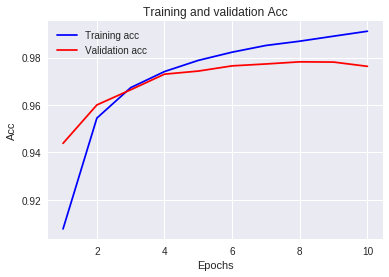

In [25]:
print_acc(dense_hist)

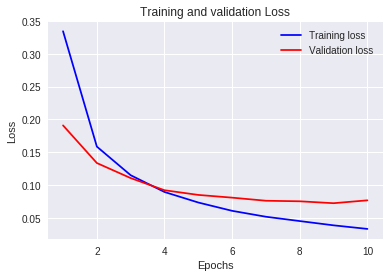

In [26]:
print_loss(dense_hist)

# Convolutional Neural Network approach

The code below show you what a basic convnet looks like. It's a stack of Conv2D and MaxPooling2D layers. 

Importantly, a convnet takes as input tensors of shape (image_height, image_width, image_channels) (not including the batch dimension). 

In our case, we will configure our convnet to process inputs of size (28, 28, 1), which is the format of MNIST images. We do this via passing the argument input_shape=(28, 28, 1) to our first layer.

In [0]:
#A function to create the model
def build_cnn_model():
    model = models.Sequential()
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Note the input dim is 28x28x1!!
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [0]:
x_tr = x_tr_src.reshape((x_tr_src.shape[0], 28, 28, 1))
x_te = x_te_src.reshape((x_te_src.shape[0], 28, 28, 1))

In [0]:
cnn_model = build_cnn_model()

In [30]:
cnn_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

You can see above that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as we go deeper in the network. The number of channels is controlled by the first argument passed to the Conv2D layers (e.g. 32 or 64).

Then, we feed our last output tensor (of shape (3, 3, 64)) into a densely-connected classifier network like those you are already familiar with: a stack of Dense layers. These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. So first, we will have to flatten our 3D outputs to 1D, and then add a few Dense layers on top. As you can see, our (3, 3, 64) outputs were flattened into vectors of shape (576,), before going through two Dense layers.

In [34]:
cnn_hist = cnn_model.fit(x_tr, y_tr, epochs=5, batch_size=64, validation_data=(x_te,y_te)) #train the model

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.0077 - acc: 0.9977 - val_loss: 0.0359 - val_acc: 0.9929
Epoch 2/5
60000/60000 [==============================] - 10s 162us/step - loss: 0.0071 - acc: 0.9980 - val_loss: 0.0433 - val_acc: 0.9905
Epoch 3/5
60000/60000 [==============================] - 10s 163us/step - loss: 0.0058 - acc: 0.9983 - val_loss: 0.0444 - val_acc: 0.9918
Epoch 4/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.0058 - acc: 0.9985 - val_loss: 0.0339 - val_acc: 0.9936
Epoch 5/5
60000/60000 [==============================] - 10s 164us/step - loss: 0.0053 - acc: 0.9983 - val_loss: 0.0495 - val_acc: 0.9909


In [0]:
cnn_hist = cnn_hist.history

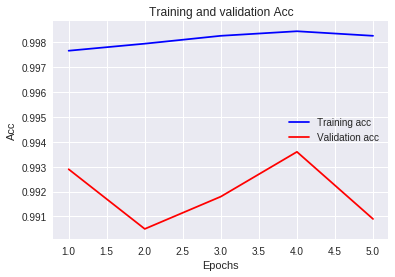

In [36]:
print_acc(cnn_hist)

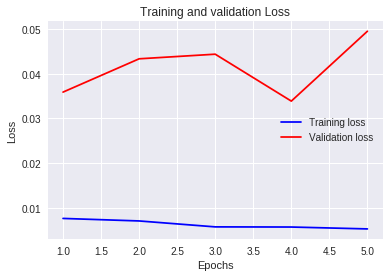

In [37]:
print_loss(cnn_hist)

While our densely-connected network from the first example had a test accuracy of 97.7%, our basic convnet has a test accuracy of 99.1%: we decreased our error rate by 61% (relative).

# Homework

In [38]:
import time
import numpy as np

start = time.time()

for i in range(100000):
    a = np.zeros([5,5])
    
end = time.time()
print("Time: %.3f seconds" % (end - start))

Time: 0.059 seconds


In [0]:
# 1- Modify def print_acc(hist) and create a function to plot time (y axis) and number of convolutional layers (x axis)
# 2- Plot the time (calling the previous defined function) for 1, 2, 3 and 4 convolutional layers:
#    epochs=5, batch_size=64
# 3- Also plot the final accuracy and the final Loss

In [0]:
def print_time(time, accuracy):
    epochs = range(1, 4)
    plt.plot(epochs, time, 'b', label='Execution Time')
    plt.plot(epochs, accuracy, 'r', label='Validation acc %')
    plt.title('Execution Time')
    plt.xlabel('Number of layers')
    plt.ylabel('')
    plt.legend()
    plt.show()

In [0]:
#A function to create the model
def build_cnn_model_time(number_layers):
    model = models.Sequential()
    
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) #Note the input dim is 28x28x1!!
    
    for i in range (1, number_layers):
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
    
    return model

In [0]:
cnn_model_1 = build_cnn_model_time(1)

In [0]:
cnn_model_2 = build_cnn_model_time(2)

In [0]:
cnn_model_3 = build_cnn_model_time(3)

In [65]:
start_1 = time.time()
cnn_hist_1 = cnn_model_1.fit(x_tr, y_tr, epochs=5, batch_size=64, validation_data=(x_te,y_te))
end_1 = time.time()

start_2 = time.time()
cnn_hist_2 = cnn_model_2.fit(x_tr, y_tr, epochs=5, batch_size=64, validation_data=(x_te,y_te))
end_2 = time.time()

start_3 = time.time()
cnn_hist_3 = cnn_model_3.fit(x_tr, y_tr, epochs=5, batch_size=64, validation_data=(x_te,y_te))
end_3 = time.time()

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.0757 - acc: 0.9767 - val_loss: 0.0597 - val_acc: 0.9791
Epoch 2/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.0431 - acc: 0.9869 - val_loss: 0.0513 - val_acc: 0.9845
Epoch 3/5
60000/60000 [==============================] - 8s 134us/step - loss: 0.0290 - acc: 0.9915 - val_loss: 0.0489 - val_acc: 0.9838
Epoch 4/5
60000/60000 [==============================] - 8s 134us/step - loss: 0.0196 - acc: 0.9944 - val_loss: 0.0575 - val_acc: 0.9838
Epoch 5/5
60000/60000 [==============================] - 8s 135us/step - loss: 0.0134 - acc: 0.9962 - val_loss: 0.0520 - val_acc: 0.9856
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 10s 159us/step - loss: 0.1343 - acc: 0.9590 - val_loss: 0.0428 - val_acc: 0.9857
Epoch 2/5
60000/60000 [==============================] - 9s 151us/step - loss

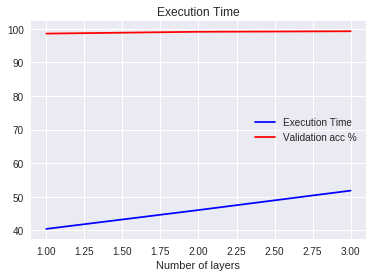

In [89]:
times = [end_1 - start_1, end_2 - start_2, end_3 - start_3]
accuracies = [cnn_hist_1.history['val_acc'][4] * 100, cnn_hist_2.history['val_acc'][4] * 100, cnn_hist_3.history['val_acc'][4] * 100]
print_time(times, accuracies)